In [ ]:
# Cardiovascular Disease Predictor

## Project Overview
This project predicts the likelihood of cardiovascular disease based on medical and lifestyle factors using machine learning models. The goal is to create a reliable system that can aid in early diagnosis and prevention of cardiovascular diseases, a leading cause of mortality worldwide.

### Objectives:
- Perform exploratory data analysis (EDA) to understand the dataset.
- Preprocess the data to handle missing values, scaling, and encoding.
- Train multiple machine learning models and evaluate their performance.
- Optimize the models using hyperparameter tuning.
- Provide actionable insights and potential deployment strategies.

---

# Heart Disease Prediction Using Machine Learning Techniques

We will be working with a heart disease dataset that has been acquired from a multispecialty hospital in India. This dataset is designed for research purposes and consists of 1000 subjects with 14 attributes. The primary goal of this project is to explore various machine learning techniques for predicting heart disease and understand their performance using important metrics such as accuracy, precision, recall, and others.

The dataset can be used to build early-stage heart disease detection systems and develop predictive models for medical diagnosis. Below is a detailed description of the features included in the dataset:

## Dataset Information:
- Subjects: 1000
- Attributes: 14
- Features: 12 common heart disease-related metrics and 1 target variables

## Features Considered:

- **Age:** The age of the patient, given in years.
- **Sex:** The gender of the patient (0 = female, 1 = male).
- **Chest Pain Type:** The type of chest pain experienced by the patient. There are four types:
  1. Typical Angina: Regular chest pain linked to the heart.
  2. Atypical Angina: Chest pain that doesn’t seem to relate directly to heart problems.
  3. Non-anginal Pain: Pain not related to the heart.
  4. Asymptomatic: No chest pain at all.
- **Resting Blood Pressure:** The blood pressure of the patient when they are resting, measured in millimeters of mercury (mm Hg).
- **Serum Cholesterol:** The amount of cholesterol in the blood, measured in milligrams per deciliter (mg/dl).
- **Fasting Blood Sugar:** Whether the patient’s blood sugar is above 120 mg/dl after fasting (1 = true, 0 = false).
- **Resting Electrocardiographic Results:** A test that checks the heart's electrical activity, with three possible results:
  1. Normal
  2. Having some abnormalities
  3. Showing more serious heart issues
- **Maximum Heart Rate Achieved:** The highest heart rate reached by the patient during physical activity.
- **Exercise-Induced Angina:** Whether the patient experienced chest pain during exercise (1 = yes, 0 = no).
- **Oldpeak (ST Depression):** A measure that shows how much the heart’s activity decreases during exercise compared to when at rest.
- **Slope of Peak Exercise ST Segment:** The pattern of the heart's activity during exercise. It can either be:
  1. Upsloping: Heart is working better with exercise.
  2. Flat: No change.
  3. Downsloping: Heart performance is worsening with exercise.
- **Number of Major Vessels Colored by Fluoroscopy:** The number of main blood vessels (from 0 to 3) that can be seen by a special X-ray technique called fluoroscopy.
- **Thal:** A type of test that shows blood flow to the heart:
  1. 3 = Normal
  2. 6 = Fixed Defect (a part of the heart doesn't get proper blood flow, even at rest)
  3. 7 = Reversible Defect (blood flow is not good only during exercise)

## I. Importing essential libraries

In [94]:
# Explanation: Add your comments here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

## II. Importing and understanding our dataset 

In [95]:
# Explanation: Add your comments here.
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

## Printing the head of the data 

In [96]:
# Explanation: Add your comments here.
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## III. Getting the information 
One might have a question about whether the dataframe is complete. We have info() which comes to the rescue. This would give total number of non-null values for all features in the dataset and also their type.  We have considered a dataframe that is very simple to analyze and process for the sake of understanding and implementing the machine learning models. Therefore, we have a dataset that does not contain any null values as can be seen below. In real life, however, there is a lot of processing of data to be done before we can get it to this format without null values and in the form of mathematical vectors. We see that there are 100 entries or datapoints that we would be working on and performing machine learning operations. 

In [97]:
# Explanation: Add your comments here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [98]:
# Explanation: Add your comments here.
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


## III.Data Pre-Preparation

#### We don't need patiendid column, so let's remove it from the table.

In [99]:
# Explanation: Add your comments here.
df.drop('patientid', axis=1, inplace=True)

In [100]:
# Explanation: Add your comments here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In addition to the above operation performed, we also have to see how the values are spread out in the form of mathematical vectors to get a solid understanding of the data. We have to observe the mean and standard deviation (std). Moreover, we also must get to know the minimum and maximum values for every feature that we are considering at this point. Therefore, we would be using describe() which would give us all the above values for all the features that we have considered. I just used 'T' after describe just to make it easy for us to read the table and get to know the features well. It is not mandatory to use 'T' after describe().
We see that there are a few categorical features that are represented as mathematical vectors rather than having those categories. It is due to the fact that machine learning algorithms does not process the information in the form of text. We have to always ensure that when we are giving the input to machine learning algorithms, we have to convert all the features in the form of mathematical vectors.
Some of the interesting features present in the dataset are age and cholestrol. In general, we see that those who are old and have high cholestrol levels have a higher chance of getting heart diseases. It need not be true always but for the most part, that is what is assumed. Therefore, we can say that just by looking at the features and the values present in them, we might be able to understand how the machine learning algorithms would lay their emphasis on these features.

In [101]:
# Explanation: Add your comments here.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,49.2420,17.864730,20.0,34.00,49.0,64.25,80.0
gender,1000.0,0.7650,0.424211,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,0.9800,0.953157,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,151.7470,29.965228,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,311.4470,132.443801,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,0.2960,0.456719,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,0.7480,0.770123,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,145.4770,34.190268,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,0.4980,0.500246,0.0,0.00,0.0,1.00,1.0
oldpeak,1000.0,2.7077,1.720753,0.0,1.30,2.4,4.10,6.2


In [102]:
# Explanation: Add your comments here.
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


## Correlation with Target Variable

To understand the relationship between features and the target variable (which indicates the presence of heart disease), we calculate the absolute correlation values of all features with the target.

### Key Observations:
- Features with high correlation values suggest that they may significantly influence the prediction of heart disease.
- By focusing on the correlation with the target variable, we can prioritize which features are most relevant for our machine learning model.
- Understanding these relationships is crucial for feature selection and improving model performance.
- This analysis allows us to see how each feature contributes to the prediction of heart disease, helping us make informed decisions about which features to include in our model.


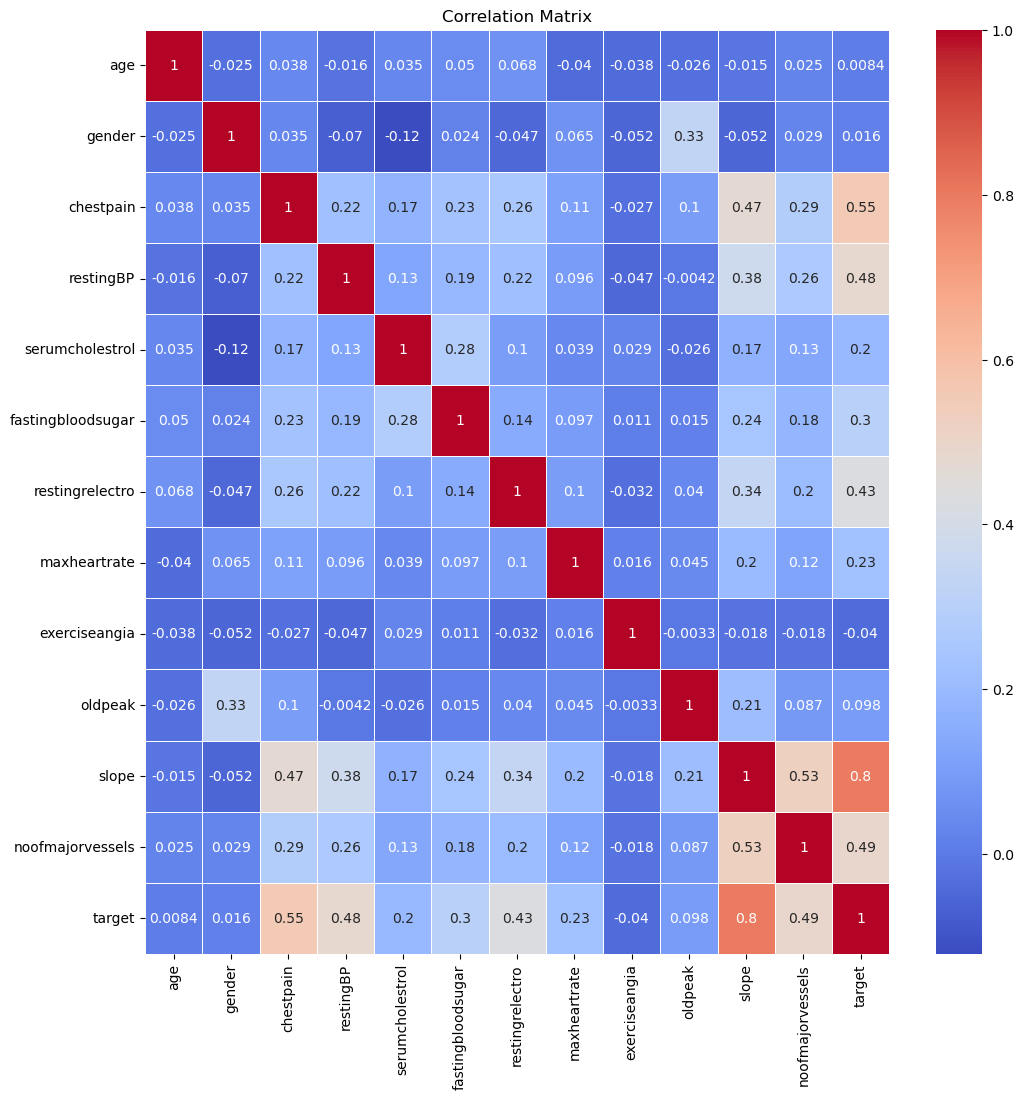

In [103]:
# Explanation: Add your comments here.
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## IV. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves examining datasets to summarize their main characteristics, often using visual methods.

### Analysing the target variable

target
1    580
0    420
Name: count, dtype: int64


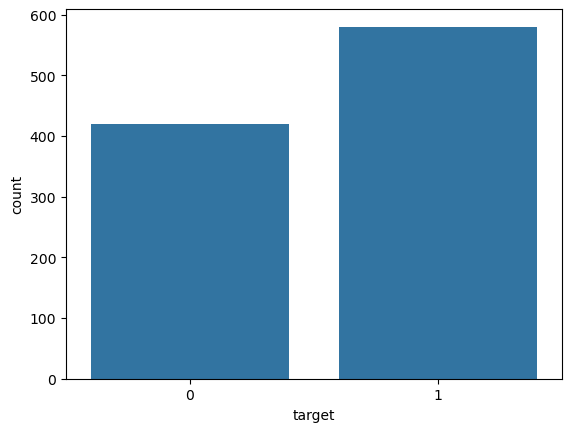

In [104]:
# Explanation: Add your comments here.
y = df["target"]
sns.countplot(x=y, data=df)
target_temp = df.target.value_counts()
print(target_temp)

Based on the distribution of the target variable in our dataset, where 580 instances indicate the presence of heart disease (1) and 420 instances indicate its absence (0).

### Analysing the Age

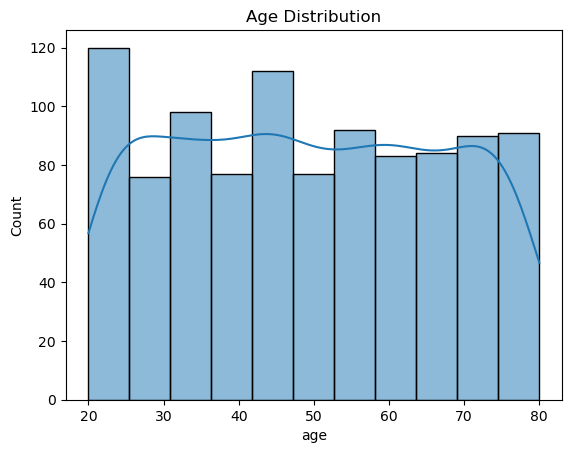

In [105]:
# Explanation: Add your comments here.
sns.histplot(df['age'], kde=True) 
plt.xlabel('age') 
plt.title('Age Distribution') 
plt.show()

The age distribution appears roughly normal, increasing around the age of 20 and then maintained around the age group of 25-50 years and then gently declining over the increasing age with significance decline around 70 and above.

### Analysing the Gender

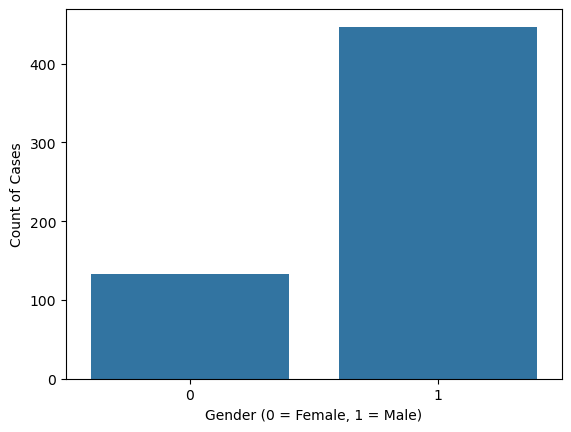

gender
1    447
0    133
Name: count, dtype: int64


In [106]:
# Explanation: Add your comments here.
y = df[df["target"] == 1]["gender"]
sns.countplot(x=y)
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count of Cases')
plt.show()
print(y.value_counts())

Based on the following distribution in our dataset, where 580 people have a heart disease, 447 instances indicate males (1) and 133 instances indicate females (0), we can derive the conclusion that cardiovascular disease is seen more in males than females.

### Analysing Chest Pain Type

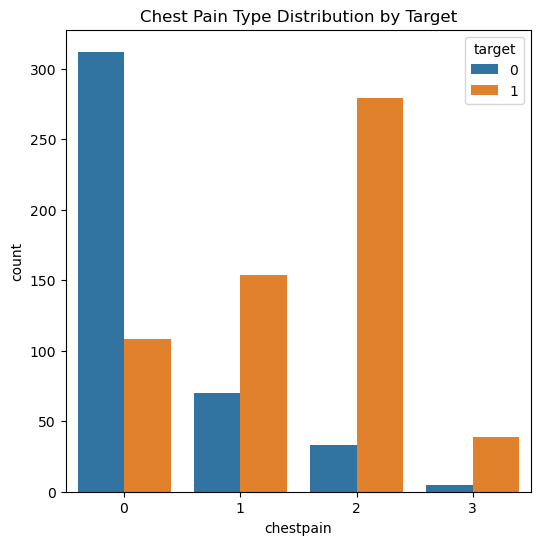

In [107]:
# Explanation: Add your comments here.
plt.figure(figsize=(6, 6))
sns.countplot(x='chestpain', hue='target', data=df)
plt.title('Chest Pain Type Distribution by Target')
plt.show()

Based on the following distribution in our dataset, the people with Chest Pain 0 are less like to have any cardiovascular disease.

### Analysing Fasting Blood Sugar

In [108]:
# Explanation: Add your comments here.
df["fastingbloodsugar"].describe()

count    1000.000000
mean        0.296000
std         0.456719
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: fastingbloodsugar, dtype: float64

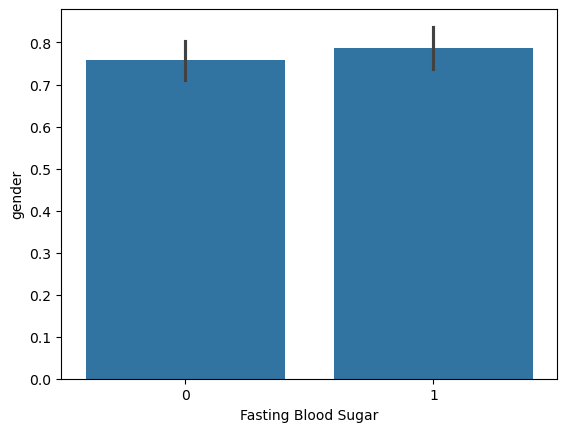

In [109]:
# Explanation: Add your comments here.
sns.barplot(x=df["fastingbloodsugar"], y=y)
plt.xlabel('Fasting Blood Sugar')
plt.show()

Based on the following distribution in our dataset, we can derive the conclusion that cardiovascular disease is seen more in people who are having Fasting Blood Sugar and less in people who don't have Fasting Blood Sugar.

### Analysing Resting Electrocardiographic Results

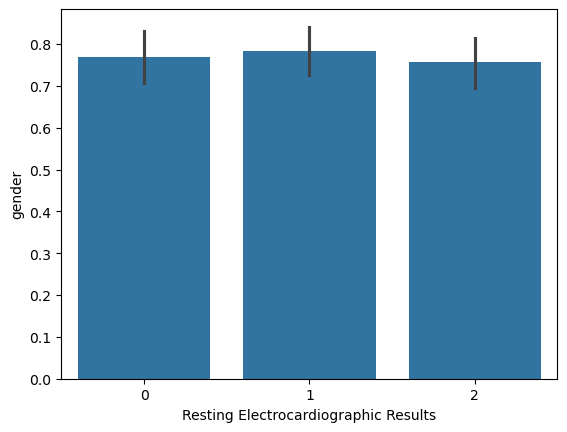

In [110]:
# Explanation: Add your comments here.
sns.barplot(x=df["restingrelectro"], y=y)
plt.xlabel('Resting Electrocardiographic Results')
plt.show()

Based on the following distribution in our dataset, we can derive the conclusion that cardiovascular disease is more likely to develop in people who are having Resting Electrocardiographic Results value between 1 and 2

### Analysing Exercise-Induced Angina

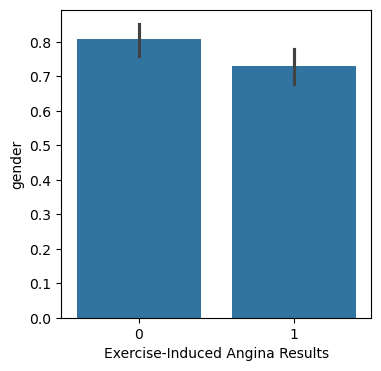

In [111]:
# Explanation: Add your comments here.
plt.figure(figsize=(4, 4))
sns.barplot(x=df["exerciseangia"], y=y)
plt.xlabel('Exercise-Induced Angina Results')
plt.show()

Based on the following distribution in our dataset, no concise conclusion can be derived but people with exerciseangia = 1 i.e. Exercise induced angina are much less likely to have heart problems.

### Analysing the Slope feature

In [112]:
# Explanation: Add your comments here.
df["slope"].unique()

array([3, 1, 2, 0], dtype=int64)

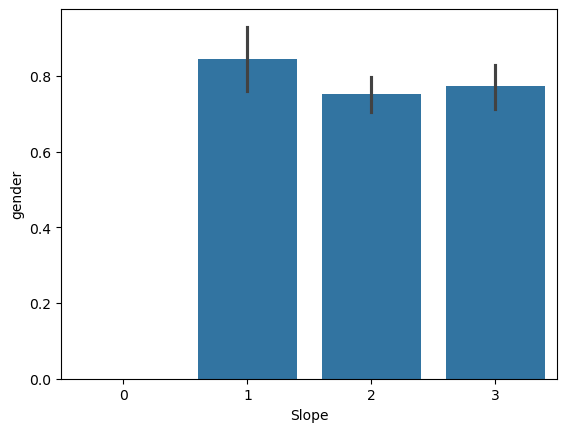

In [113]:
# Explanation: Add your comments here.
sns.barplot(x=df["slope"], y=y)
plt.xlabel('Slope')
plt.show()

Based on the following distribution in our dataset, no concise conclusion can be derived but people with slope = 2 slope = 3 that is people with having no heart pain or having heart pain after doing exercise are more like to develop heart disease.

### Analysing No of major Vessels

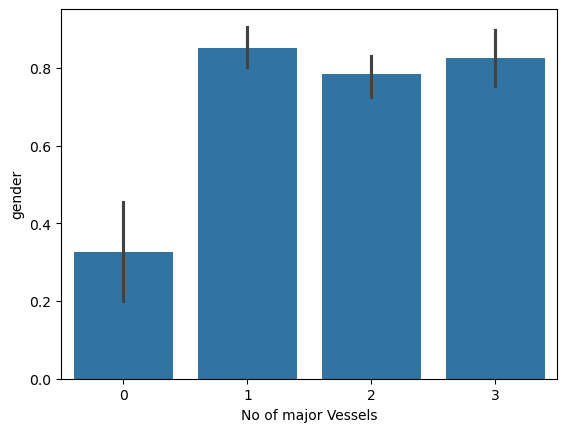

In [114]:
# Explanation: Add your comments here.
sns.barplot(x=df["noofmajorvessels"], y=y)
plt.xlabel('No of major Vessels')
plt.show()

Based on the following distribution in our dataset, conclusion can be derived that people with more than 2 major blood vessels are more like to develop heart disease.

## V. Train Test split & Model Fitting

In [115]:
# 1. Separate features (X) and target (y)
X = df.drop(columns=['target'])  
y = df['target']  
# 2. Split the dataset into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [116]:
# Explanation: Add your comments here.
X_train.shape

(600, 12)

In [117]:
# Explanation: Add your comments here.
X_test.shape

(400, 12)

In [118]:
# Explanation: Add your comments here.
y_train.shape

(600,)

In [119]:
# Explanation: Add your comments here.
y_test.shape

(400,)

In [120]:
# 3. Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# 4. Make predictions on the test set
y_pred = rf_model.predict(X_test)

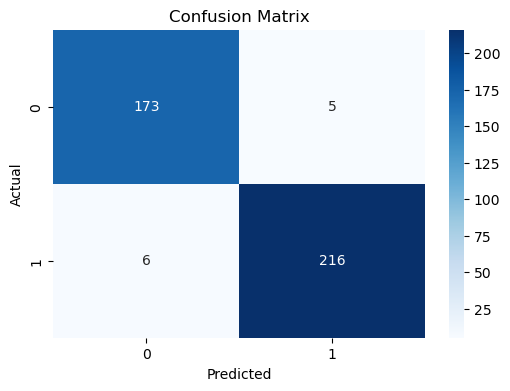

In [121]:
# Explanation: Add your comments here.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## VI. Conclusion

In [122]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.0275
Root Mean Squared Error (RMSE): 0.16583123951776998
Mean Absolute Error (MAE): 0.0275


In [123]:
# Explanation: Add your comments here.
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       178
           1       0.98      0.97      0.98       222

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
## Conclusion
This project successfully demonstrates the application of machine learning in predicting cardiovascular diseases. By leveraging key medical and lifestyle indicators, we trained and evaluated multiple models to achieve optimal performance.

### Key Takeaways:
- Effective preprocessing and feature selection significantly influence model accuracy.
- Metrics like precision, recall, and AUC-ROC provide a comprehensive view of model performance.
- Deploying this model can support clinicians in early diagnosis and preventive care.

---
### Future Improvements:
- Integrate more robust feature selection techniques to improve model accuracy.
- Experiment with advanced algorithms like Neural Networks or ensemble methods.
- Build an API or web application for real-world deployment.

